## Introduction to SpaCy
SpaCy is one of the main libraries for NLP in Python. It is especially tailored towards the (development and) deployment of pipelines for a number of NLP tasks, from named entity recognition to dependency parsing. Recent additions to spaCy also make it possible to use advanced models (LLMs) as building block for such pipelines. 

In this notebook, we will explore some of SpaCy's basic functionality. As we will mainly focus on understanding and implementing methods to represent and generate text, we will not be using SpaCy extensively for the rest of the course -- but it is a great tool for many applications, and it has wonderful documentation.

Let's start by importing SpaCy.
You may need to install this first (I am using `spacy==3.6.1`) -- add it to your requirements file if you have one.

In [4]:
import spacy
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import re
from collections import defaultdict
from sklearn.decomposition import PCA

When spaCy is loaded, we then need to initialize a model.

NB: Models first have to be downloaded from the command line. An overview of avaiable models from spaCy can be found [here](https://spacy.io/usage/models):
```
python -m spacy download en_core_web_md
```
Note that models for a wide range of languages are available on SpaCy, feel free to experiment!

In [2]:
nlp = spacy.load("en_core_web_md")

We first create a `spaCy` pipeline which is going to be used for all of our analysis. Essentially we feed our examples of language down the pipeline, and get annotated texts out the end. Let's load the first 10 chapters of "War and Peace", the text file we worked with last week.

In [3]:
book = open('../data/book-war-and-peace.txt').read()

In [ ]:
print(book)

Let's now find where chapter 10 starts, and only keep text until there.

Applying the model to the whole book might make it crash since it's such a long book.

In [4]:
chap_10_index = re.search('CHAPTER X', book).start() # Chapters numered by roman numeral 
book = book[:chap_10_index]

The final object that comes out of the end is known as a `spaCy` `Doc` which is essentially a list of tokens. However, rather than just being a list of strings, each of the tokens in this list have their own attributes, which can be accessed using the dot notation.

In [5]:
doc = nlp(book)

The resulting `doc` parses the text in sentences and tokens within sentences. Tokens are basically words within sentences

In [5]:
for s in doc.sents:
    print(s)
    for t in s:
        print(t)

NameError: name 'doc' is not defined

Each token in the doc is annotated for a number of attributes.

In [7]:
i = 0
for token in doc:
    i += 1
    print(token.text, "\t\t", token.pos_, "\t\t", token.dep_,"\t\t", token.lemma_, "\t\t")
    if i == 50:
        break

CHAPTER 		 PROPN 		 prep 		 CHAPTER 		
I 		 PRON 		 pobj 		 I 		


 		 SPACE 		 dep 		 

 		
" 		 PUNCT 		 punct 		 " 		
Well 		 INTJ 		 intj 		 well 		
, 		 PUNCT 		 punct 		 , 		
Prince 		 PROPN 		 appos 		 Prince 		
, 		 PUNCT 		 punct 		 , 		
so 		 ADV 		 advmod 		 so 		
Genoa 		 PROPN 		 nsubj 		 Genoa 		
and 		 CCONJ 		 cc 		 and 		
Lucca 		 PROPN 		 conj 		 Lucca 		
are 		 AUX 		 ROOT 		 be 		
now 		 ADV 		 advmod 		 now 		
just 		 ADV 		 advmod 		 just 		
family 		 NOUN 		 compound 		 family 		
estates 		 NOUN 		 attr 		 estate 		
of 		 ADP 		 prep 		 of 		
the 		 DET 		 det 		 the 		

 		 SPACE 		 dep 		 
 		
Buonapartes 		 PROPN 		 pobj 		 Buonapartes 		
. 		 PUNCT 		 punct 		 . 		
But 		 CCONJ 		 cc 		 but 		
I 		 PRON 		 nsubj 		 I 		
warn 		 VERB 		 ccomp 		 warn 		
you 		 PRON 		 dobj 		 you 		
, 		 PUNCT 		 punct 		 , 		
if 		 SCONJ 		 mark 		 if 		
you 		 PRON 		 nsubj 		 you 		
do 		 AUX 		 aux 		 do 		
n't 		 PART 		 neg 		 not 		
tell 		 VERB 		 advcl 		 tell 		
me 	

### Exploring named entities

Let's explore one of the features of spaCy: named entity recognition. These are all the named entities spaCy finds in the text.

In [8]:
doc.ents

(Prince,
 Genoa,
 Lucca,
 Buonapartes,
 Antichrist,
 July,
 1805,
 Anna Pavlovna
 Scherer,
 Empress,
 Marya Fedorovna,
 Prince Vasili Kuragin,
 first,
 Anna Pavlovna,
 some days,
 St. Petersburg,
 French,
 footman,
 morning,
 tonight,
 Scherer,
 French,
 Anna Pavlovna,
 First,
 Anna Pavlovna,
 English,
 Today,
 Wednesday,
 today,
 Novosiltsev,
 Buonaparte,
 Prince Vasili,
 Anna Pavlovna Scherer,
 forty years,
 Anna Pavlovna,
 Austria,
 Austria,
 Russia,
 Europe,
 one,
 one,
 England,
 Alexander,
 Malta,
 Novosiltsev,
 English,
 Prussia,
 Buonaparte,
 Europe,
 Hardenburg,
 Haugwitz,
 Prussian,
 Europe,
 Wintzingerode,
 Prussia,
 two,
 tonight,
 Vicomte de Mortemart,
 Rohans,
 one,
 French,
 the Abbe Morio,
 the Dowager Empress,
 first,
 Vienna,
 Prince Vasili,
 Marya Fedorovna,
 Anna Pavlovna,
 Empress,
 Funke,
 the Dowager Empress,
 Empress,
 Anna Pavlovna's,
 d'estime,
 Anna Pavlovna,
 Empress,
 two,
 Anatole,
 Two,
 Majesty,
 Hippolyte,
 Anatole,
 Anna Pavlovna,
 Anna Pavlovna,
 Anat

SpaCy also has some nice utils to visualize like named entities or dependency relations between individual words (try replace `ent` with `dep`). Let's see how this looks:

Not all spaCy models have been trained to do this task

In [9]:
spacy.displacy.serve(doc[:300], style="ent")

/work/NLP_classwork/NLP-AU-23/env/lib/python3.10/site-packages/spacy/displacy/__init__.py:106: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'ent' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


In [23]:
spacy.displacy.serve(doc[:300], style="dep")


Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...



Now let's try to look at the frequency of each entity, and see what information we can extract on the characters named in the book.

In [10]:
entity_counts = defaultdict(lambda: 0) # fancy way of initializing a python dictonary, maybe better than doing an empty dict []
for e in doc.ents:
    if e.label_ == 'PERSON':
        entity_counts[e.text] += 1 # take the text of the entity, add to the dictonary each time, so for each person count each time 

In [11]:
import pandas as pd
entity_df = pd.DataFrame.from_dict(entity_counts, 
                                   orient='index').reset_index()
entity_df = entity_df.rename({'index': 'entity', 0: 'count'}, axis=1).sort_values(by='count', ascending=False)

In [11]:
entity_df

,entity,count
29,Pierre,98
5,Anna Pavlovna,55
43,Prince Andrew,39
84,Dolokhov,26
36,Prince Hippolyte,16
...,...,...
73,Uncle,1
74,Prince Andrew\nslowly,1
78,comme il\nfaut,1
79,Vasili Kuragin's,1


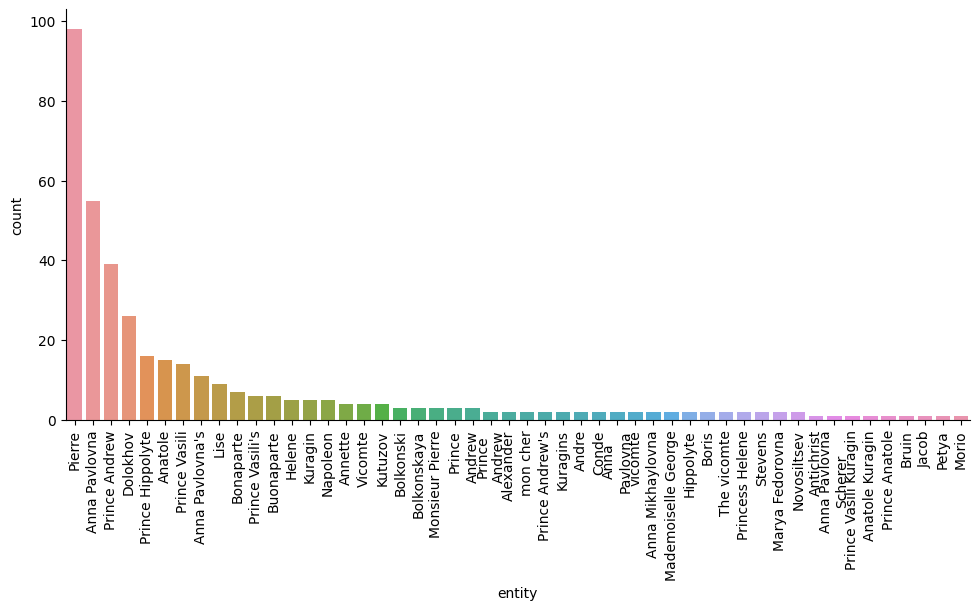

In [12]:
sns.catplot(data=entity_df.head(n=50), x='entity', y='count', kind='bar', height=5, aspect=2)
plt.xticks(rotation=90)
plt.show()

We have a pretty accurate model of who they main characters in War and Peace are! You may notice that some entities are actually duplicates (`Anna Pavlovna` and `Anna Pavlovna's`: these could in principle be manually normalized or, more elegantly, clustered using pipelines for a task called "coreference resolution"). 

### Character time series
As a demonstration of what you can do with this, let's focus on the top 3 characters. Can we plot a time series, visualizing how many times they are mentioned in each of the 9 chapters?

In [13]:
idxs = []
for t in doc:
    if t.text == 'CHAPTER':
        idxs.append(t.idx) # append start index of the chapter

In [14]:
char_count_by_chapter = dict(zip(entity_df.entity.head(n=3).tolist(),
                                 [dict(zip(range(1,10),[0]*9)),
                                  dict(zip(range(1,10),[0]*9)),
                                  dict(zip(range(1,10),[0]*9))])) # there are more elegant ways to do this, with defaultdict

for e in doc.ents:
    if e.text in char_count_by_chapter.keys():
        for nr, i in enumerate(idxs):
            if e.start_char < i:
                char_count_by_chapter[e.text][nr] += 1 # is this correct?
                break
            else:
                if nr == 8:
                    char_count_by_chapter[e.text][9] += 1


In [15]:
dfs = []
for k,v in char_count_by_chapter.items():
    df = pd.DataFrame.from_dict(v, orient='index').reset_index().rename({'index': 'chapter',
                                                                         0: 'count'}, axis=1)
    df['character'] = k
    dfs.append(df)
char_df = pd.concat(dfs)

<Axes: xlabel='chapter', ylabel='count'>

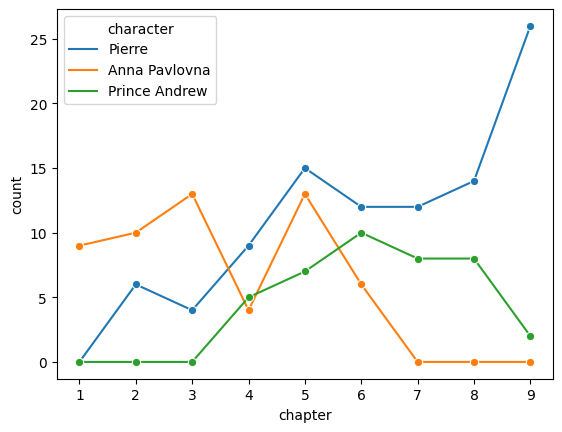

In [16]:
sns.lineplot(data=char_df, x='chapter', y='count', hue='character', marker='o')

## Word vectors
One of the attributes that spaCy models provide is easy access to word vectors. These are not based on counts, but on more sophisticated algorithms that we will look into in detail next week, but the intuition is the same as count-based vectors. Let's use this to put some of the notions we explored in our lecture into practice. First, let's take a look at some of the tokens in our text

In [17]:
for i, t in enumerate(doc[:20]):
    print(i, t.text)

0 CHAPTER
1 I
2 


3 "
4 Well
5 ,
6 Prince
7 ,
8 so
9 Genoa
10 and
11 Lucca
12 are
13 now
14 just
15 family
16 estates
17 of
18 the
19 



Let's focus on the token "family" (occurring, e.g., at index 15). We want to identify the words that are most similar to family (of those present in the text). With SpaCy, we can compute cosine similarity between vectors using in-build functionality. The following piece of code computes the similarity between "family" (the token at index 15) and "estates" (the token at index 16).

In [18]:
doc[15].similarity(doc[16])

0.5541646480560303

Based on this, can you identify the 20 tokens, of those occurring in our doc, whose vectors are *most similar* to "family"? Do the results make sense?

In [ ]:
# I figured out the cosine similarity for the list of word above...not the right thing 

for i, t in enumerate(doc[:20]):
    print(i, doc[15].similarity(doc[i]))

In [10]:
sims = {}
for i, t in enumerate(doc): #enumerate, slightly more sophisticated version of a for loop, returns both token and index in a list
    if t.text not in sims.keys(): # this part skips calculating similarity if it already has a key (meaning it's been done already)
        cosine_sim = doc[15].similarity(doc[i])
        sims[t.text] = cosine_sim
cos_df = pd.DataFrame.from_dict(sims, orient='index').reset_index() 
cos_df.columns=['token', 'cosine_sim']
cos_df = cos_df.sort_values(by='cosine_sim', ascending=False)

cos_df.head(20)

/tmp/ipykernel_6899/1274206028.py:4: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  cosine_sim = doc[15].similarity(doc[i])


,token,cosine_sim
14,family,1.000000
496,families,0.742623
899,mother,0.670364
650,father,0.669876
195,grandfathers,0.653718
2184,friends,0.610817
739,brother,0.591992
722,fathers,0.590159
1609,mothers,0.583737
1577,friendship,0.572327


This looks very promising: can you do the same with other words? What happens if you look at the *most dissimilar* words?

Can find a lot from similarities but the most dissimilar is often junk 

In [11]:
cos_df.tail(20)

,token,cosine_sim
519,Funke,-0.106777
1290,Wait,-0.107927
163,7,-0.109517
164,10,-0.110373
2154,de-,-0.111380
808,femme,-0.111893
631,bump,-0.113940
286,Do,-0.114494
1956,gasps,-0.140330
939,Mind,-0.145291


Finally, let's visualize some vectors. Let's sample 200 random nouns, reduce the vector dimensionality with a technique called principal component analysis, and let's visualize the resulting space.

In [12]:
random_indices = []
for i, t in enumerate(doc):
    if t.pos_ == 'NOUN':
        random_indices.append(i)
        if len(random_indices) == 200:
            break

In [13]:
pca = PCA(n_components=2)
vectors = np.vstack([doc[i].vector for i in random_indices])
reduced_vectors = pca.fit_transform(vectors) # transform into a 2d space

In [14]:
reduced_vectors

array([[  3.1791775 ,  15.339187  ],
       [-12.254092  ,  19.101028  ],
       [ -6.8909802 ,  46.33977   ],
       [  2.165297  ,  -2.9467845 ],
       [  7.26904   ,  -6.617432  ],
       [ 18.259632  ,   5.9544444 ],
       [  9.28156   ,  18.941475  ],
       [ -5.113919  ,  -4.8473773 ],
       [ -5.3348145 ,  -3.6367505 ],
       [  6.21686   ,  13.377733  ],
       [  3.4246414 ,  -9.37188   ],
       [  3.731278  , -14.444039  ],
       [ 41.130775  ,  10.802423  ],
       [ -6.4876995 ,  11.063411  ],
       [-22.040827  ,  -0.04968315],
       [-17.904943  ,  -0.5030683 ],
       [  1.8021585 ,  -9.945539  ],
       [ -0.86826324,  -1.557615  ],
       [  7.2406893 , -21.320305  ],
       [  7.2406893 , -21.320305  ],
       [  7.803125  , -13.5098095 ],
       [ -1.3209496 ,   9.356406  ],
       [-19.75635   ,   0.5480184 ],
       [-16.893995  ,   1.5303347 ],
       [  0.1295365 ,  -6.0596824 ],
       [ -3.8488815 ,  -0.750608  ],
       [ -6.7136283 ,  -2.8171859 ],
 

Now let's plot the reduced vectors in 2D space:

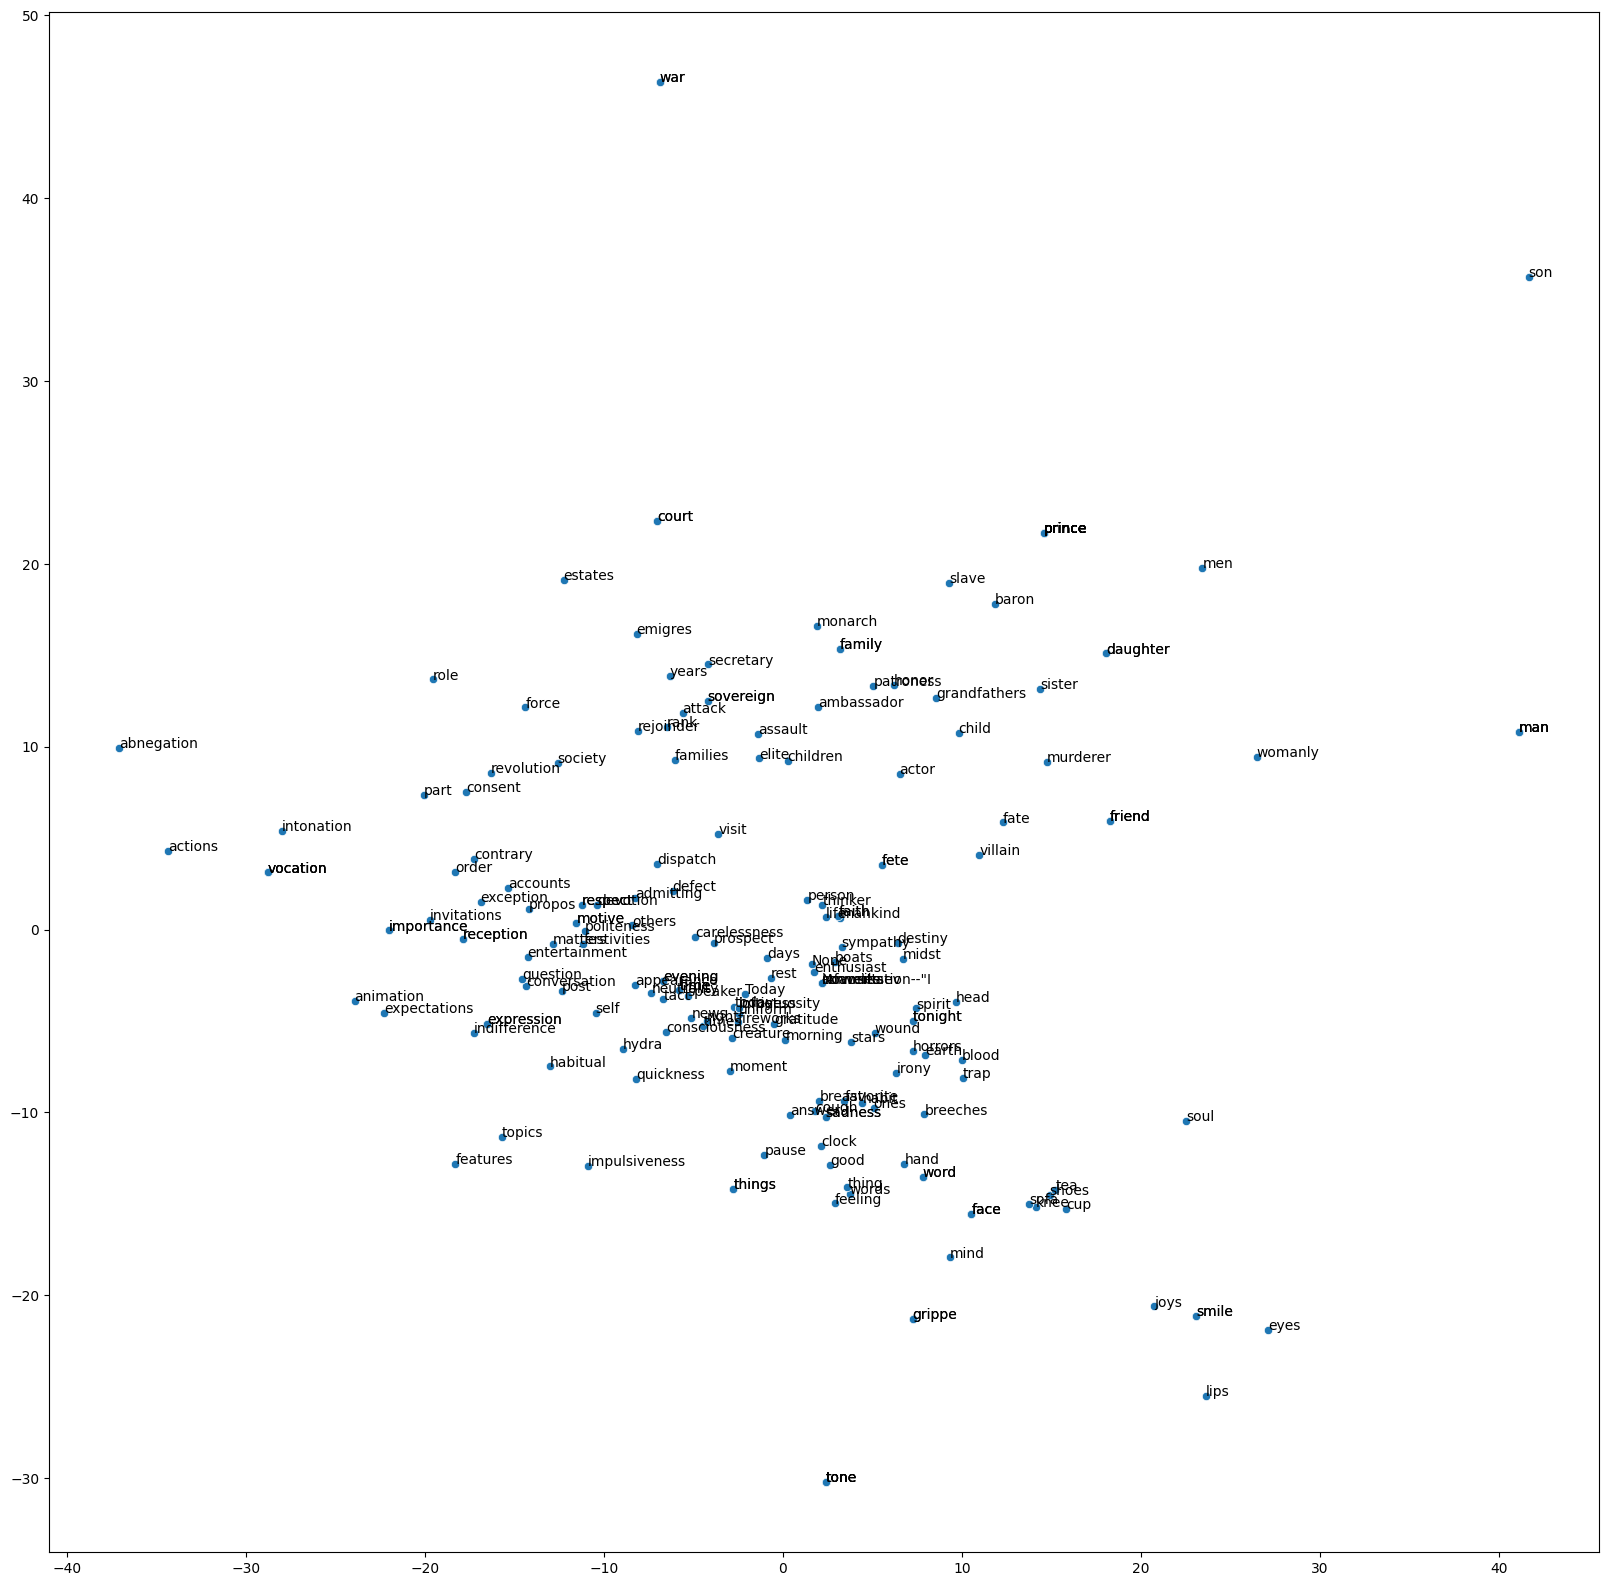

In [15]:
plt.subplots(figsize=(20,20))
sns.scatterplot(x=reduced_vectors[:200,0], y=reduced_vectors[:200,1])
for i in range(200):
    plt.text(reduced_vectors[i,0], 
             reduced_vectors[i,1], 
             doc[random_indices[i]])

Do you notice anything promising in terms of relations between vectors?

Note that you can also use `scikit-learn` to compute `euclidean_distances` and `cosine_similarity`, see: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics.pairwise. These functions require a matrix as input, and they compute all pairwise similarities between rows of the matrix.

**Optional**: can you implement your own versions functions to compute euclidean distance and cosine similarity? Look at the formulas from Lecture 2, and use `spaCy` or `scikit-learn` functions to check that they are correct. We will experiment more with word vectors next week.

## Task
In the shared data drive on UCloud, there is a folder called `data`, where you can find a file called `News_Category_Dataset_v2.json`. This is taken from [this Kaggle exercise](https://www.kaggle.com/datasets/rmisra/news-category-dataset) and comprises some 200k news headlines from [HuffPost](https://www.huffpost.com/). The data is a json lines format, with one JSON object per row. You can load this data into pandas in the following way:
```
data = pd.read_json(filepath, lines=True)
```
Select a couple of sub-categories of news data and use spaCy to find the relative frequency per **10k words** of each of the following word classes - NOUN, VERB, ADJECTIVE, ADVERB (in the headlines).
Save the results as a CSV file (again using pandas).
Are there any differences in the distributions?

In [18]:
df = pd.read_json("../../../819739/data/News_Category_Dataset_v3.json", lines=True)

In [20]:
df.category.unique()

array(['U.S. NEWS', 'COMEDY', 'PARENTING', 'WORLD NEWS', 'CULTURE & ARTS',
       'TECH', 'SPORTS', 'ENTERTAINMENT', 'POLITICS', 'WEIRD NEWS',
       'ENVIRONMENT', 'EDUCATION', 'CRIME', 'SCIENCE', 'WELLNESS',
       'BUSINESS', 'STYLE & BEAUTY', 'FOOD & DRINK', 'MEDIA',
       'QUEER VOICES', 'HOME & LIVING', 'WOMEN', 'BLACK VOICES', 'TRAVEL',
       'MONEY', 'RELIGION', 'LATINO VOICES', 'IMPACT', 'WEDDINGS',
       'COLLEGE', 'PARENTS', 'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE',
       'HEALTHY LIVING', 'THE WORLDPOST', 'GOOD NEWS', 'WORLDPOST',
       'FIFTY', 'ARTS', 'DIVORCE'], dtype=object)

In [21]:
df = df[df['category'].isin(['U.S. NEWS', 'CRIME', 'WEDDINGS'])]

In [ ]:
df[df['category']=='COMEDY'] # ['headline'].tolist()

In [ ]:
from collections import Counter

# deactivate expensive computations
nlp.select_pipes(disable=['ner','parser'])
# convenience trick to avoid limits, there's other ways to avoid them -- e.g., applying the pipeline to each element in parallel 
nlp.max_length = 2323037 # took max length of all headlines in the three categories and how many characters you get, max length and concatonate

cats = df.category.unique().tolist() # separates each category
outs = []
for c in cats: # going through each category 
    text = ' '.join(df[df['category']==c]['headline'].tolist()) # take the headlines and make into a huge string of text 
    doc = nlp(text)
    pos_list = []
    for t in doc: # for each token t in doc 
        pos = t.pos_
        if pos in ['ADJ', 'ADV', 'NOUN', 'VERB']:
            pos_list.append(t.pos_)
    count_df = pd.DataFrame.from_dict(dict(Counter(pos_list)), 
                                      orient='index').reset_index()
    count_df.columns = ['pos', 'count']
    count_df['n_tokens'] = len(doc) # a way to normalize the counts for each pos
    count_df['category'] = c
    count_df['count_normalized'] = round((count_df['count'] / count_df['n_tokens']) * 10000,4)
    outs.append(count_df[['pos', 
                          'count_normalized', 
                          'category']].sort_values(by='count_normalized'))